In [67]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Orlandi-a11/datasets/main/Dados_Bancarios.csv'
dados = pd.read_csv(url, sep=';')
dados.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [68]:
dados.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [69]:
dados['age'] = dados['age'].astype(float)
dados['balance'] = dados['balance'].astype(float)
dados['day'] = dados['day'].astype(float)
dados['duration'] = dados['duration'].astype(float)
dados['campaign'] = dados['campaign'].astype(float)
dados['pdays'] = dados['pdays'].astype(float)
dados['previous'] = dados['previous'].astype(float)

In [70]:
dados.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [71]:
a = dados[['y']]
X = dados.drop(['y','contact','poutcome'], axis=1)
X.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,30.0,unemployed,married,primary,no,1787.0,no,no,19.0,oct,79.0,1.0,-1.0,0.0
1,33.0,services,married,secondary,no,4789.0,yes,yes,11.0,may,220.0,1.0,339.0,4.0
2,35.0,management,single,tertiary,no,1350.0,yes,no,16.0,apr,185.0,1.0,330.0,1.0
3,30.0,management,married,tertiary,no,1476.0,yes,yes,3.0,jun,199.0,4.0,-1.0,0.0
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,5.0,may,226.0,1.0,-1.0,0.0


In [72]:
!pip install catboost

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, a_train, a_test = train_test_split(X, a, test_size=0.2)

In [74]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(X.dtypes != float)[0]

print(categorical_features_indices)

[1 2 3 4 6 7 9]


In [75]:
model = CatBoostClassifier(
custom_loss=[metrics.Precision()],
random_seed=42,
)

model.fit(
X_train, a_train,
cat_features=categorical_features_indices,
eval_set=(X_test, a_test),
);


Learning rate set to 0.04353
0:	learn: 0.6500470	test: 0.6507046	best: 0.6507046 (0)	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6090867	test: 0.6094955	best: 0.6094955 (1)	total: 16.7ms	remaining: 8.31s
2:	learn: 0.5683811	test: 0.5701227	best: 0.5701227 (2)	total: 23.5ms	remaining: 7.82s
3:	learn: 0.5350963	test: 0.5381174	best: 0.5381174 (3)	total: 28.1ms	remaining: 6.99s
4:	learn: 0.5084467	test: 0.5122688	best: 0.5122688 (4)	total: 33.8ms	remaining: 6.73s
5:	learn: 0.4797520	test: 0.4844947	best: 0.4844947 (5)	total: 39.2ms	remaining: 6.49s
6:	learn: 0.4576017	test: 0.4631157	best: 0.4631157 (6)	total: 44.6ms	remaining: 6.32s
7:	learn: 0.4354512	test: 0.4426365	best: 0.4426365 (7)	total: 50.2ms	remaining: 6.22s
8:	learn: 0.4133045	test: 0.4218552	best: 0.4218552 (8)	total: 55.7ms	remaining: 6.13s
9:	learn: 0.4000578	test: 0.4092411	best: 0.4092411 (9)	total: 60.2ms	remaining: 5.96s
10:	learn: 0.3889993	test: 0.3984521	best: 0.3984521 (10)	total: 65.2ms	remaining: 5.87s
11:	learn: 0

Acurácia: 0.89
Precision: 0.86
Matriz de Confusão


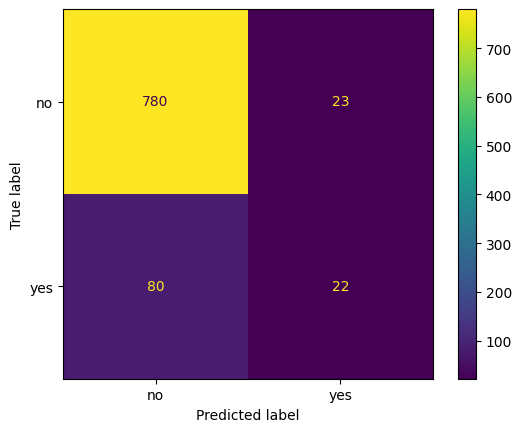

In [76]:

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
a_pred = model.predict(X_test)

# Acurácia é tudo que ele acertou dividido pela quantidade total -
acc = accuracy_score(a_test, a_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(a_test, a_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(a_test, a_pred, labels=a_train['y'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=a_train['y'].unique())
disp.plot()

In [77]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(X.dtypes != float)[0]

print(categorical_features_indices)

[1 2 3 4 6 7 9]


In [78]:
model = CatBoostClassifier(
custom_loss=[metrics.Precision()],
random_seed=42,
auto_class_weights='Balanced',
logging_level='Silent'
)

model.fit(
X_train, a_train,
cat_features=categorical_features_indices,
eval_set=(X_test, a_test),
);

Acurácia: 0.84
Precision: 0.90
Matriz de Confusão


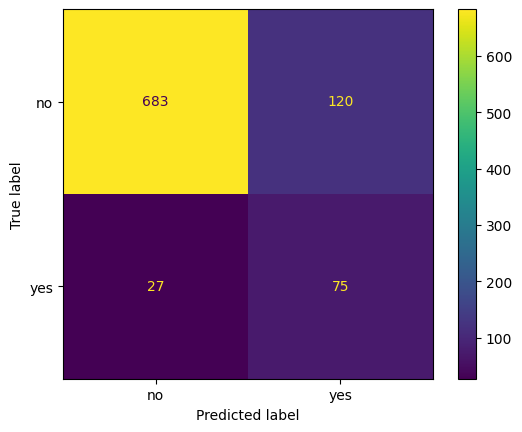

In [79]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
a_pred = model.predict(X_test)

# Acurácia é tudo que ele acertou dividido pela quantidade total -
acc = accuracy_score(a_test, a_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(a_test, a_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(a_test, a_pred, labels=a_train['y'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=a_train['y'].unique())
disp.plot()
